In [7]:
%matplotlib inline

from pathlib import Path
import json

import matplotlib.pyplot as plt
import pandas as pd

data_dir = Path('/home/hadim/.data/Neural_Network/captchanet')
dataset_dir = data_dir / 'dataset'

hyperparam_dir = data_dir / 'hyperparam_search' / 'v5_search_1'

In [8]:
root_data = json.load(open(hyperparam_dir / 'tuner.json'))
trial_paths = root_data['trials']

data = []
for trial_path in trial_paths:
  trial = json.load(open(trial_path))
  trial_id = trial['trial_id']
  
  datum = {}
  datum['trial_id'] = trial_id
  datum['trial_path'] = trial_path
  datum.update(trial['hyperparameters']['values'])
  
  for name, values in trial['averaged_metrics']['metrics_history'].items():
    datum[name] = values[-1]
    datum[f'{name}_history'] = values
    
  data.append(datum)
  
data = pd.DataFrame(data)
data = data.sort_values('val_accuracy', ascending=False)
data

,accuracy,accuracy_history,dropout_rate,loss,loss_history,lr,lr_history,momentum,optimizer_name,regularizer_value,starting_lr,trial_id,trial_path,use_regularizer,val_accuracy,val_accuracy_history,val_loss,val_loss_history
0,0.982719,"[0.21198749542236328, 0.21233125030994415, 0.2...",0.4,0.313818,"[3.6050740895271303, 3.5262264065742492, 3.680...",0.0025,"[0.009999999776482582, 0.009999999776482582, 0...",0.95,adam,0.00001,0.01,069c83a69ad4828514816e2c96df609c,/home/hadim/.data/Neural_Network/captchanet/hy...,True,0.97155,"[0.21022500097751617, 0.21144999563694, 0.1934...",0.348759,"[3.6221643886566164, 3.5501227989196775, 4.013..."
1,0.210637,"[0.21003125607967377, 0.21064375340938568, 0.2...",0.3,3.556467,"[5.061578692913056, 3.857713914394379, 3.79920...",0.0500,"[0.10000000149011612, 0.10000000149011612, 0.1...",0.90,rmsprop,0.10000,0.10,aaafc0132e23478a0c403370de0df879,/home/hadim/.data/Neural_Network/captchanet/hy...,False,0.20965,"[0.20995000004768372, 0.2102999985218048, 0.20...",8.069096,"[7.256721939086914, 7.680403343200684, 4.60785..."


Text(0, 0.5, 'Validation Loss')

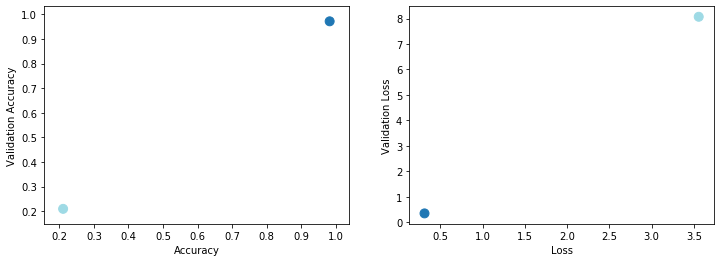

In [9]:
size = 4

fig, axs = plt.subplots(ncols=2, figsize=(size * 3, size))
axs = axs.flatten()

axs[0].scatter(data['accuracy'], data['val_accuracy'], c=data.index, cmap='tab20', s=80)
axs[0].set_xlabel('Accuracy')
axs[0].set_ylabel('Validation Accuracy')

axs[1].scatter(data['loss'], data['val_loss'], c=data.index, cmap='tab20', s=80)
axs[1].set_xlabel('Loss')
axs[1].set_ylabel('Validation Loss')

Text(0, 0.5, 'Learning Rate')

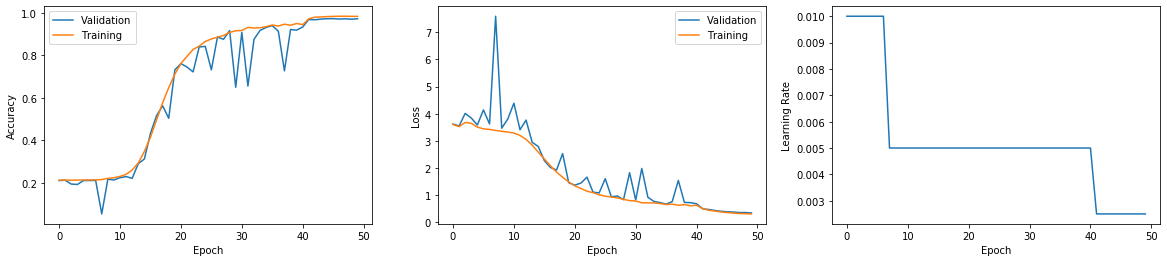

In [11]:
datum = data.iloc[0]

fig, axs = plt.subplots(ncols=3, figsize=(size * 5, size))
axs = axs.flatten()

axs[0].plot(datum['val_accuracy_history'], label="Validation")
axs[0].plot(datum['accuracy_history'], label="Training")
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(datum['val_loss_history'], label="Validation")
axs[1].plot(datum['loss_history'], label="Training")
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

axs[2].plot(datum['lr_history'])
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Learning Rate')

In [12]:
datum

accuracy                                                         0.982719
accuracy_history        [0.21198749542236328, 0.21233125030994415, 0.2...
dropout_rate                                                          0.4
loss                                                             0.313818
loss_history            [3.6050740895271303, 3.5262264065742492, 3.680...
lr                                                                 0.0025
lr_history              [0.009999999776482582, 0.009999999776482582, 0...
momentum                                                             0.95
optimizer_name                                                       adam
regularizer_value                                                   1e-05
starting_lr                                                          0.01
trial_id                                 069c83a69ad4828514816e2c96df609c
trial_path              /home/hadim/.data/Neural_Network/captchanet/hy...
use_regularizer                       